# Imports

In [100]:
import numpy
import scipy
import scipy.stats
import astropy 
import astropy.io
import astropy.io.ascii
import matplotlib.pyplot as plt
import Library_GraphTwoDimensionDensityColorMap


# Read in the data:

In [101]:
data = astropy.io.ascii.read( "RandomVariable_Generated_Data.astropydat" )
print ( data )

         A                   B           C 
------------------- ------------------- ---
   2.34805892031837  2.7833044104717874 0.0
-2.5367703345204946  -3.223129500167275 0.0
0.07704929376485503   -6.53968302126885 0.0
 1.5609166237924597  4.0781308481517025 0.0
 1.3052908596160373   7.576748569392135 0.0
 1.1193454431794485   4.225939751821434 0.0
 1.3871657592678626 0.21699058961656836 0.0
 3.5879197155248357   2.856459401189608 0.0
 2.2391260230266217   4.076909882093242 0.0
-0.5508589930363759 -3.4768902550146032 0.0
                ...                 ... ...
  7.328855453080676  5.7784354587730125 1.0
  6.270926305535283   8.285009841419276 1.0
   3.43656495159575   5.534786245696807 1.0
  6.001630063542476   2.515748619124201 1.0
   6.73771228201486   9.145617331955476 1.0
  7.797023632639812  12.522945604906258 1.0
  4.928325307181959   5.326715868428739 1.0
  8.223696982347143  12.814809276759945 1.0
 -0.718454312092919   5.249247606033224 1.0
  4.549855220976612  10.00192182

# Some useful helper functions:

In [102]:
def plot_1D_function( 
    Functions = None,
    minp = None,
    maxp = None,
    nump = None,
    ):
    
       
    if None in [Functions, minp, maxp, nump]: 
        raise Exception("arg missing..." + str([Function, minp, maxp, nump]))
    
    for Function in Functions:

        TrialPoints = numpy.linspace(-20, 20, 100)
        Values = []
        for TrailPoint in TrialPoints:
            Values.append(Function ( TrailPoint) )

        plt.plot(TrialPoints, Values)
    
    
    
    return

# Marginal Distributions:

### Make a histogram of the data from column A

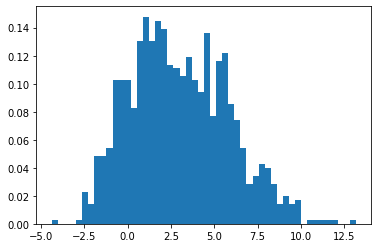

In [140]:
Adata = data['A']
plt.hist(Adata, density=True,bins=50)
plt.show()

### Make a histogram of the data from column B

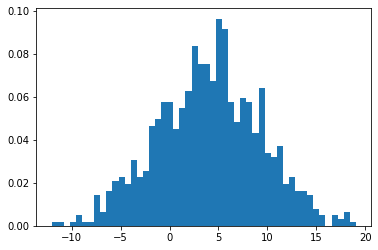

In [141]:
Bdata = data['B']
plt.hist(Bdata, density=True,bins=50)
plt.show()

### Approximate the data from column A as a univariate gaussian: (MARGINAL)

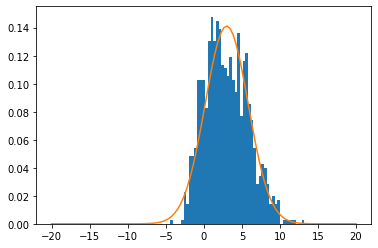

In [142]:
A_standard_deviation = numpy.sqrt( numpy.var( Adata ) )
A_mean = numpy.mean(Adata)

ATrialPoints = numpy.linspace(-20, 20, 100)
AValuePoints = scipy.stats.norm.pdf(TrialPoints, loc = A_mean, scale = A_standard_deviation )

plt.hist(A, density=True, bins=50)
plt.plot(ATrialPoints, AValuePoints)
plt.show()

### Approximate the data from column B as a univariate gaussian: (MARGINAL)

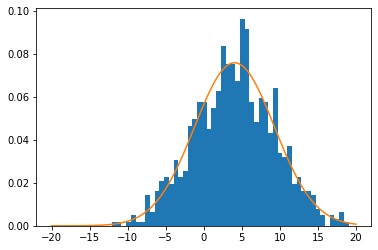

In [143]:
B_standard_deviation = numpy.sqrt( numpy.var( Bdata ) )
B_mean = numpy.mean(Bdata)

BTrialPoints = numpy.linspace(-20, 20, 100)
BValuePoints = scipy.stats.norm.pdf(TrialPoints, loc = B_mean, scale = B_standard_deviation )

plt.hist(B, density=True, bins=50)
plt.plot(BTrialPoints, BValuePoints)
plt.show()

# Conditional distributions

### (1) Approximate the joint probability density function of A and B with a multivariate gaussian


[[ 2.34805892  2.78330441]
 [-2.53677033 -3.2231295 ]
 [ 0.07704929 -6.53968302]
 ...
 [-0.71845431  5.24924761]
 [ 4.54985522 10.00192182]
 [ 2.01951902  2.63079009]]
[2.99955955 4.04468073]
[[ 7.99350891 10.64174365]
 [10.64174365 27.5921548 ]]
0.008750587705242674
DomainMinimumPoint [ -5 -10]
DomainMaximumPoint [10 15]
PlugInPointsCount 10000
PointsToPlugInDataset.shape (10000, 2)
PointsToPlugInDataset[0] [ -5. -10.]
MaxObservedValue 0.01536105692196176
MinObservedValue 1.0601610495048858e-12
Z.shape (100, 100)


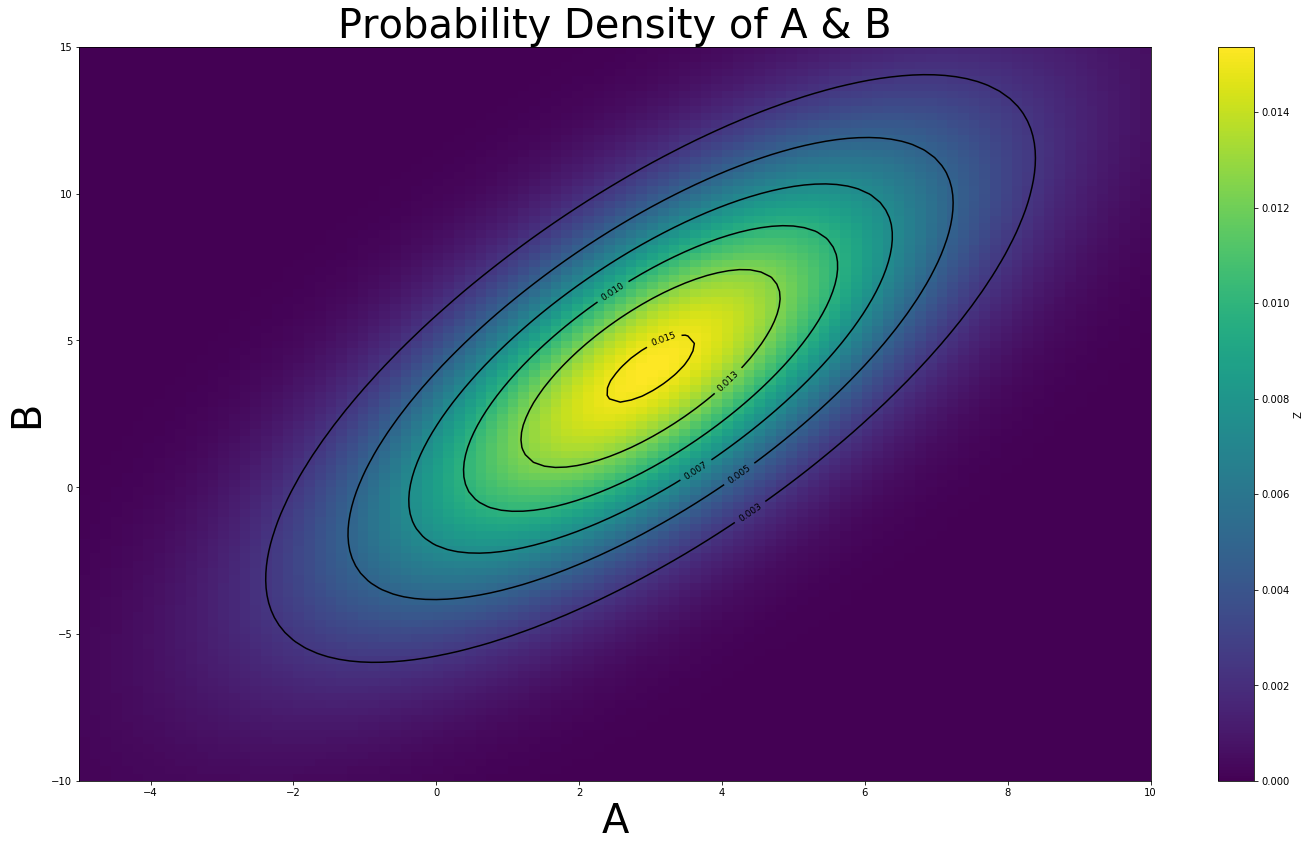

In [144]:

ABdata = numpy.vstack( ( data['A'], data['B'] ) ).T
print(ABdata)

ABMean = numpy.mean( ABdata, axis = 0 )
print (ABMean)

ABCovarianceMatrix = numpy.cov( ABdata, rowvar = False )
print (ABCovarianceMatrix)

def jointGaussian(ABpoint):
    return scipy.stats.multivariate_normal.pdf( ABpoint, ABMean, ABCovarianceMatrix )
print ( jointGaussian( [0,0]) )

Library_GraphTwoDimensionDensityColorMap.Main(
    Function = jointGaussian,
    DomainMinimumPoint  = numpy.array([-5, -10]),
    DomainMaximumPoint  = numpy.array([10, 15]),
    ShowContours = True,
    PrintExtra = False,
    )
plt.title("Probability Density of A & B", fontsize=40)
plt.ylabel('B',fontsize=40)
plt.xlabel('A',fontsize=40)
plt.draw()

### (1)  Fixing A = 0, plot the unnormalized probability density of B:


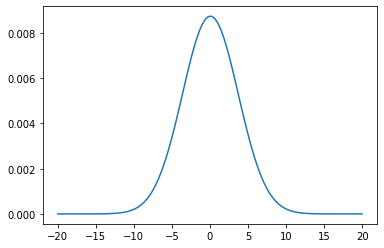

In [145]:
def BdensityConditionalOnA0_unnormalized(Bpoint):
    return jointGaussian( [0, Bpoint] )


plot_1D_function( 
    Functions = [BdensityConditionalOnA0_unnormalized],
    minp = -20,
    maxp = 20,
    nump = 100,
    )
plt.show()

### (1) Fixing A = 0, plot the normalized probability density function of B:


In [146]:
FullIntegrationResult = scipy.integrate.quad( 
    BdensityConditionalOnA0_unnormalized, 
    -100, 
    100, 
    full_output = False
    )[0]
print (FullIntegrationResult )

def BdensityConditionalOnA0_normalized(Bpoint):
    return BdensityConditionalOnA0_unnormalized(Bpoint) / FullIntegrationResult



0.08037557606921111


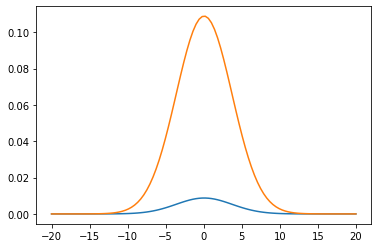

In [147]:
plot_1D_function( 
    Functions = [BdensityConditionalOnA0_unnormalized, BdensityConditionalOnA0_normalized],
    minp = -20,
    maxp = 20,
    nump = 100,
    )
plt.show()

### (1) Fixing A = 7, plot the probability density of B:


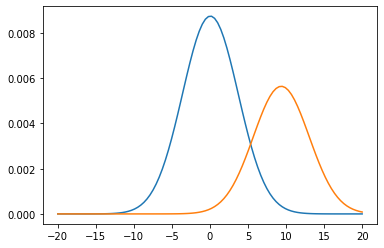

In [148]:
def BdensityConditionalOnA7_unormalized(Bpoint):
    return jointGaussian( [7, Bpoint] )

plot_1D_function( 
    Functions = [BdensityConditionalOnA0_unnormalized, BdensityConditionalOnA7_unormalized],
    minp = -20,
    maxp = 20,
    nump = 100,
    )
plt.show()

### (1) Fixing B = 0 plot the unnormalized probability density of A:


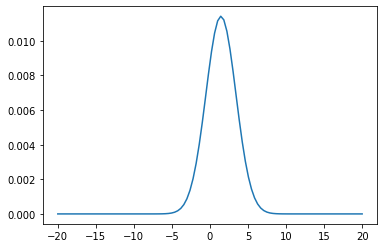

In [149]:
def AdensityConditionalOnB0_unnormalized(Apoint):
    return jointGaussian( [Apoint, 0] )


plot_1D_function( 
    Functions = [AdensityConditionalOnB0_unnormalized],
    minp = -20,
    maxp = 20,
    nump = 100,
    )
plt.show()

### (1) Fixing B = 7, plot the normalized probability density of A:


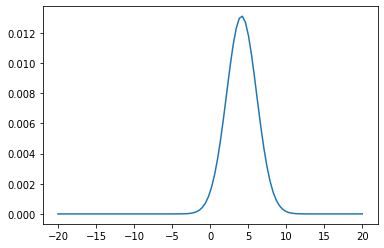

In [150]:
def AdensityConditionalOnB7_unnormalized(Apoint):
    return jointGaussian( [Apoint, 7] )


plot_1D_function( 
    Functions = [AdensityConditionalOnB7_unnormalized],
    minp = -20,
    maxp = 20,
    nump = 100,
    )
plt.show()

### (2) Approximate the joint probability density function of A and B with a kernel density estimation


DomainMinimumPoint [-10 -10]
DomainMaximumPoint [20 20]
PlugInPointsCount 10000
PointsToPlugInDataset.shape (10000, 2)
PointsToPlugInDataset[0] [-10. -10.]
MaxObservedValue [0.01482457]
MinObservedValue [6.24500824e-170]
Z.shape (100, 100)


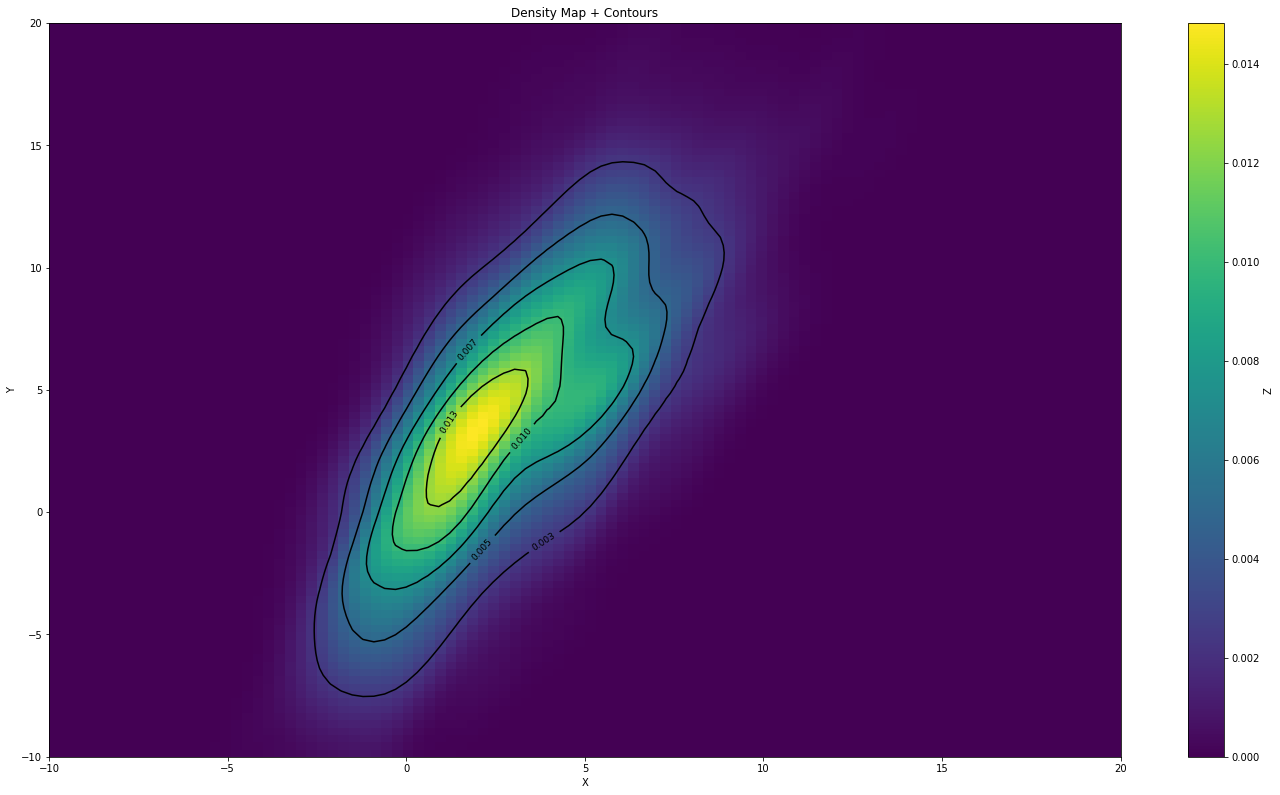

In [151]:
kernel_object = scipy.stats.gaussian_kde( ABdata.T ) #takes in points sideways...

Library_GraphTwoDimensionDensityColorMap.Main(
    Function = kernel_object.pdf,
    DomainMinimumPoint  = numpy.array([-10, -10]),
    DomainMaximumPoint  = numpy.array([20, 20]),
    ShowContours = True,
    PluginPointCount = 10000,
    PrintExtra = False,
    )

### (2) Approximate the conditional probability density function of B, fixing A to 5:


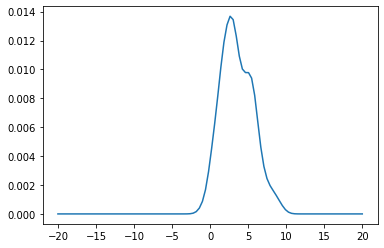

In [152]:


def AdensityConditionalOnB5_unnormalized_kde(Apoint):
    return (kernel_object.pdf( [ Apoint, 5]) )


plot_1D_function( 
    Functions = [AdensityConditionalOnB5_unnormalized_kde],
    minp = -20,
    maxp = 20,
    nump = 100,
    )
plt.show()

### (2) Approximate the conditional probability density function of A, fixing B to 5:


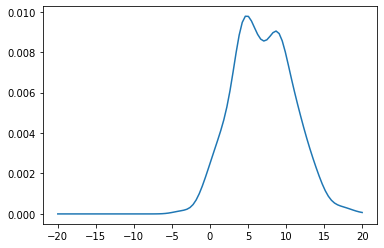

In [153]:
def AdensityConditionalOnB5_unnormalized_kde(Bpoint):
    return (kernel_object.pdf( [ 5, Bpoint]) )


plot_1D_function( 
    Functions = [AdensityConditionalOnB5_unnormalized_kde],
    minp = -20,
    maxp = 20,
    nump = 100,
    )
plt.show()

Note how the double peaked nature of the gaussian could be missed assuming gaussianity

# Final Excercise: Code up your own 1D kernel density estimation function against the data in Column A:

In [168]:
def UnivariateGaussian( Point, Mean, StandardDeviation):
    return scipy.stats.norm.pdf( Point, Mean, StandardDeviation )


def GenerateKernelDensityEstimationFunction1D( Data ):
    
    def KDE(  Value  ):
        Result = 0
        Bandwidth = numpy.sqrt( numpy.var(Data) ) / 6
        for Datapoint in Data:
            Result += UnivariateGaussian( Value, Datapoint, Bandwidth )
        Probability = Result / len(Data)
        return Probability
    
    return KDE
    
    
    

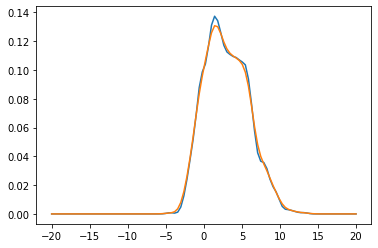

In [169]:
Personal_KDE_Function = GenerateKernelDensityEstimationFunction1D( Adata )

scipy_KDE_Function = scipy.stats.gaussian_kde( Adata ).pdf

plot_1D_function( 
    Functions = [Personal_KDE_Function, scipy_KDE_Function],
    minp = -20,
    maxp = 20,
    nump = 100,
    )
plt.show()

# Discuss choice of bandwidth, delta functions, and understand the overfitting problem:

In [ ]:

def GenerateKernelDensityEstimationFunction1D_bad( Data ):
    
    def KDE(  Value  ):
        Result = 0
        Bandwidth = numpy.sqrt( numpy.var(Data) ) / 100
        for Datapoint in Data:
            Result += UnivariateGaussian( Value, Datapoint, Bandwidth )
        Probability = Result / len(Data)
        return Probability
    
    return KDE

Personal_KDE_Function_bad = GenerateKernelDensityEstimationFunction1D( Adata )

scipy_KDE_Function = scipy.stats.gaussian_kde( Adata ).pdf

plot_1D_function( 
    Functions = [Personal_KDE_Function_bad, scipy_KDE_Function],
    minp = -20,
    maxp = 20,
    nump = 100,
    )
plt.show()
